# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri. Sumber dataset: https://www.kaggle.com/datasets/edsonmarin/historic-sales-of-electric-vehicles

   Dataset terdiri dari 834 baris data dan 8 atribut.

   Atribut:

      1. Region: Menunjukkan wilayah atau negara tempat data penjualan kendaraan listrik dicatat (data kategorikal).
      2. Category: Menyatakan kategori data yang digunakan, yaitu Historical (kategorikal).
      3. Parameter: Menunjukkan parameter pengukuran berupa jumlah penjualan kendaraan listrik (EV sales) (kategorikal).
      4. Mode: Jenis moda transportasi yang dianalisis, yaitu Cars (kategorikal).
      5. Powertrain: Menjelaskan jenis sistem penggerak kendaraan listrik, yang terdiri dari:
      
          BEV (Battery Electric Vehicle): 53%
          
          PHEV (Plug-in Hybrid Electric Vehicle): 47%

      6. Year: Tahun pencatatan data penjualan kendaraan listrik (numerik).
      7. Unit: Satuan pengukuran data, yaitu Vehicles (kategorikal).
      8. Value: Menunjukkan jumlah kendaraan listrik yang terjual sesuai dengan kombinasi atribut lainnya (numerik).

    Target:
  
    - Value: Variabel ini merepresentasikan jumlah penjualan kendaraan listrik yang digunakan sebagai dasar analisis atau proses prediksi berdasarkan wilayah, periode waktu, serta jenis sistem penggerak kendaraan.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd               # Digunakan untuk pengolahan serta analisis data
import numpy as np                # Library yang berguna untuk perhitungan matematis dan array
import matplotlib.pyplot as plt   # Modul untuk membuat berbagai jenis grafik
import seaborn as sns             # Dipakai untuk visualisasi data dengan tampilan yang lebih estetik
from sklearn.preprocessing import StandardScaler   # Alat untuk melakukan standarisasi fitur
from sklearn.preprocessing import LabelEncoder     # Untuk mengubah variabel kategori menjadi angka


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Memuat data dari file Excel ke dalam DataFrame
import pandas as pd

df = pd.read_csv('IEA-EV-dataEV salesCarsHistorical.csv')

# Menampilkan 5 baris pertama data
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Menampilkan ringkasan dataset seperti tipe data dan jumlah nilai yang tidak kosong
df.info()

# Melihat dimensi data (total baris dan kolom)
df.shape

# Menampilkan daftar nama kolom dalam dataset
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      834 non-null    object
 1   category    834 non-null    object
 2   parameter   834 non-null    object
 3   mode        834 non-null    object
 4   powertrain  834 non-null    object
 5   year        834 non-null    int64 
 6   unit        834 non-null    object
 7   value       834 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 52.3+ KB


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [ ]:
# Menampilkan ringkasan statistik untuk fitur bertipe numerik
df.describe()

# Menghitung jumlah variasi nilai pada setiap kolom bertipe kategori
df.select_dtypes(include='object').nunique()


,0
region,36
category,1
parameter,1
mode,1
powertrain,2
unit,1


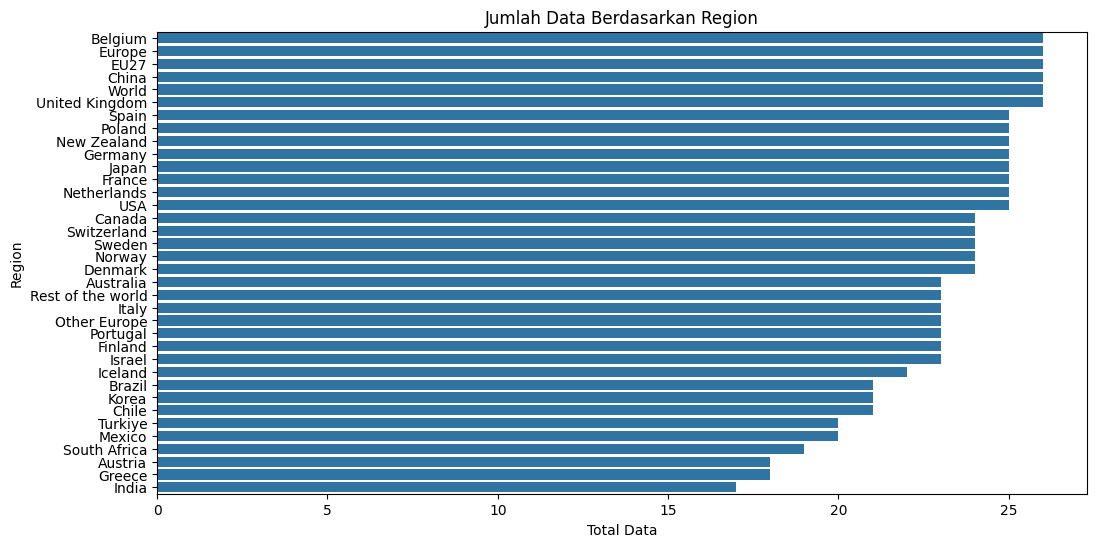

In [ ]:
# Visualisasi jumlah data berdasarkan region
plt.figure(figsize=(12, 6))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Jumlah Data Berdasarkan Region')
plt.xlabel('Total Data')
plt.ylabel('Region')
plt.show()


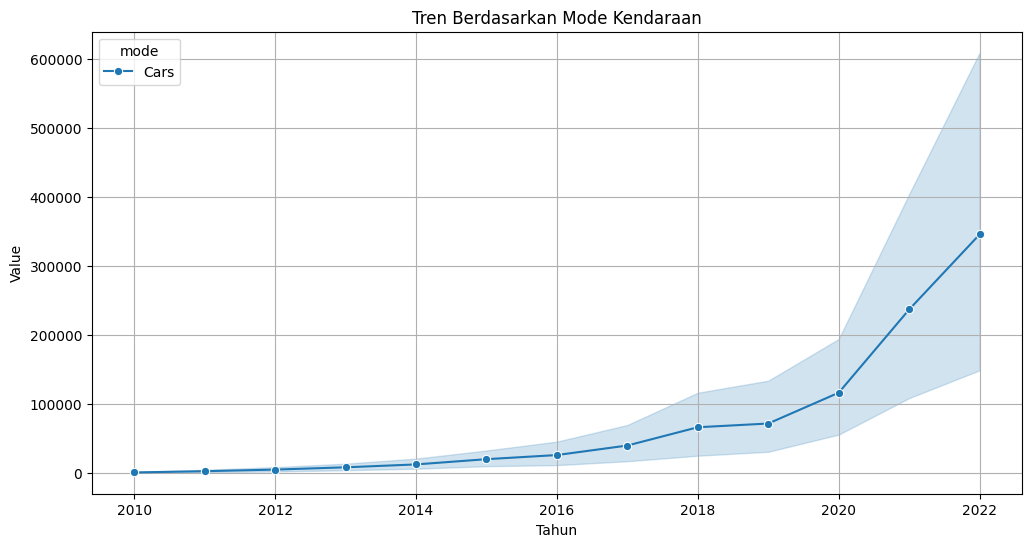

In [ ]:
# Tren berdasarkan mode
plt.figure(figsize=(12,6))

sns.lineplot(data=df, x='year', y='value', hue='mode', marker='o')

plt.title('Tren Berdasarkan Mode Kendaraan')
plt.xlabel('Tahun')
plt.ylabel('Value')
plt.grid(True)
plt.show()



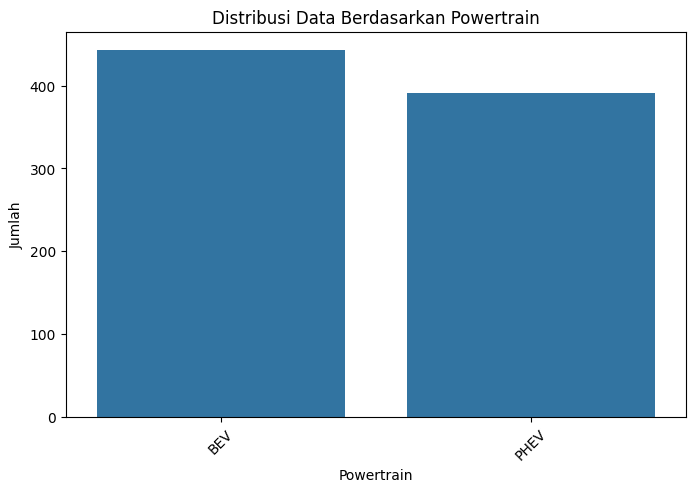

In [ ]:
# Distribusi data berdasarkan Powertrain
plt.figure(figsize=(8,5))
sns.countplot(x='powertrain', data=df, order=df['powertrain'].value_counts().index)
plt.title('Distribusi Data Berdasarkan Powertrain')
plt.xlabel('Powertrain')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Memeriksa jumlah data yang hilang pada setiap kolom
df.isnull().sum()

# Jika ditemukan nilai kosong, dapat dilakukan penanganan seperti menghapus atau mengisinya
df = df.dropna()  # alternatif lain: df.fillna(nilai)


In [ ]:
# Mengevaluasi jumlah baris yang terduplikasi dalam dataset
df.duplicated().sum()

# Menghapus data duplikat apabila ditemukan
df = df.drop_duplicates()


In [ ]:
# Membuat objek StandardScaler untuk melakukan standardisasi data numerik
scaler = StandardScaler()

# Melakukan transformasi pada kolom 'value'
# Kolom 'value' diubah menjadi distribusi standar (mean = 0, std = 1)
df['value_scaled'] = scaler.fit_transform(df[['value']])


In [ ]:
# Membuat objek encoder untuk mengubah data kategorikal menjadi angka
label_enc = LabelEncoder()

# Daftar kolom bertipe object yang ingin diubah menjadi numeric
kolom_kategorikal = ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']

# Melakukan proses encoding untuk setiap kolom kategorikal
for kol in kolom_kategorikal:
    df[kol] = label_enc.fit_transform(df[kol])

In [ ]:
# Menampilkan 5 baris pertama untuk memastikan encoding berhasil
df.head()

,region,category,parameter,mode,powertrain,year,unit,value,value_scaled
0,0,0,0,0,0,2011,0,49,-0.199919
1,0,0,0,0,0,2012,0,170,-0.199621
2,0,0,0,0,1,2012,0,80,-0.199843
3,0,0,0,0,1,2013,0,100,-0.199793
4,0,0,0,0,0,2013,0,190,-0.199572


In [ ]:
df.shape        # mengecek ukuran dataset, berapa banyak baris dan kolom
df.columns      # menampilkan daftar lengkap nama-nama fitur dalam dataframe


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value', 'value_scaled'],
      dtype='object')

In [ ]:
df.describe()   # Memberikan ringkasan statistik untuk kolom numerik (mean, std, min, max, quartile)


,region,category,parameter,mode,powertrain,year,unit,value,value_scaled
count,834.000000,834.0,834.0,834.0,834.000000,834.000000,834.0,8.340000e+02,8.340000e+02
mean,17.641487,0.0,0.0,0.0,0.468825,2016.579137,0.0,8.141432e+04,-4.259849e-18
std,10.455864,0.0,0.0,0.0,0.499327,3.511476,0.0,4.072362e+05,1.000600e+00
min,0.000000,0.0,0.0,0.0,0.000000,2010.000000,0.0,1.000000e+00,-2.000367e-01
25%,8.250000,0.0,0.0,0.0,0.000000,2014.000000,0.0,3.400000e+02,-1.992037e-01
50%,18.000000,0.0,0.0,0.0,0.000000,2017.000000,0.0,3.100000e+03,-1.924223e-01
75%,27.000000,0.0,0.0,0.0,1.000000,2020.000000,0.0,2.300000e+04,-1.435269e-01
max,35.000000,0.0,0.0,0.0,1.000000,2022.000000,0.0,7.300000e+06,1.773643e+01


In [ ]:
# Menampilkan beberapa baris pertama untuk melihat isi kolom 'region' dan 'category'
df[['region', 'category']].head()


,region,category
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# Menyimpan dataset yang sudah melalui proses preprocessing
df.to_csv('IEA-EV-dataEV salesCarsHistorical_cleaned.csv', index=False)

print("File dataset yang sudah diproses berhasil disimpan dengan nama 'IEA-EV-dataEV salesCarsHistorical_cleaned.csv'")


File dataset yang sudah diproses berhasil disimpan dengan nama 'IEA-EV-dataEV salesCarsHistorical_cleaned.csv'


In [ ]:
# Memuat dataset yang sudah melalui proses pembersihan
df_clean = pd.read_csv('IEA-EV-dataEV salesCarsHistorical_cleaned.csv')

# Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
df_clean.head()


,region,category,parameter,mode,powertrain,year,unit,value,value_scaled
0,0,0,0,0,0,2011,0,49,-0.199919
1,0,0,0,0,0,2012,0,170,-0.199621
2,0,0,0,0,1,2012,0,80,-0.199843
3,0,0,0,0,1,2013,0,100,-0.199793
4,0,0,0,0,0,2013,0,190,-0.199572


In [ ]:
# Menyimpan daftar seluruh library beserta versinya ke dalam file requirements.txt
!pip freeze > requirements.txt